In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random 
import time 

$H_0: p = p_0$ 

$H_1: p > p_0$

In [2]:
α = 0.05 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α)

1.6448536269514722


In [3]:
sample_sizes = np.array( [30, 50, 70] + list( np.arange(100, 2100, 100) ) )
sample_sizes 

array([  30,   50,   70,  100,  200,  300,  400,  500,  600,  700,  800,
        900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
       2000])

In [4]:
p0s = np.arange(0.01, 0.21, 0.01)
p0s 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [5]:
st = time.time()

errors_total = []

for p0 in p0s: 

    errors_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 

        samples = np.random.binomial(1, p0, (100000, n)) 
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n) 
        decisions = (z_values >= z_α).astype(int) 
        type_I_error_sim = np.mean(decisions) 
        
        errors_per_n[k] = type_I_error_sim
    
    errors_total += errors_per_n

print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 1253.7534811496735 seconds


In [6]:
print( 
    len(errors_total), 
    len(sample_sizes), 
    len(p0s)
) 

460 23 20


In [7]:
a = [p0s[0]] * len(sample_sizes)

for i in range(1, len(p0s)): 
    a += [list(p0s)[i]] * len(sample_sizes)
    
#print(a)
len(a)

460

In [8]:
b = list(pd.Series(a).round(2))

In [9]:
d2 = {"p0": b, "n": list(sample_sizes) * len(p0s), "type_I_error": errors_total}
df2 = pd.DataFrame(d2)
df2

,p0,n,type_I_error
0,0.01,30,0.03577
1,0.01,50,0.08994
2,0.01,70,0.03351
3,0.01,100,0.07869
4,0.01,200,0.05255
...,...,...,...
455,0.20,1600,0.04988
456,0.20,1700,0.04857
457,0.20,1800,0.05407
458,0.20,1900,0.05222


In [10]:
df2.dtypes

p0              float64
n                 int32
type_I_error    float64
dtype: object

In [11]:
df22 = df2
df22["p0"] = df22["p0"].astype(str)
df22.dtypes 

p0               object
n                 int32
type_I_error    float64
dtype: object

In [12]:
df222 = df22.pivot_table(values = "type_I_error", index = "n", columns = "p0")
df222

p0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2
n,,,,,,,,,,,,,,,,,,,,
30,0.03577,0.11811,0.05994,0.11740,0.06039,0.10201,0.05605,0.08974,0.04778,0.07278,0.04097,0.06117,0.08652,0.04965,0.06913,0.03952,0.05639,0.07642,0.04523,0.06044
50,0.08994,0.07949,0.06289,0.04956,0.03777,0.07713,0.05918,0.04327,0.07583,0.05842,0.04293,0.07061,0.05292,0.03962,0.06358,0.04712,0.07224,0.05432,0.04200,0.06146
70,0.03351,0.05187,0.06072,0.06166,0.06081,0.05778,0.05522,0.05091,0.04824,0.04483,0.04039,0.07128,0.06410,0.05940,0.05400,0.04738,0.04168,0.06861,0.06051,0.05508
100,0.07869,0.05170,0.08006,0.04645,0.06314,0.07682,0.04711,0.05609,0.06474,0.07307,0.04664,0.05158,0.05490,0.06111,0.06617,0.04204,0.04668,0.04948,0.05354,0.05547
200,0.05255,0.04934,0.08040,0.06078,0.04385,0.05808,0.06984,0.05044,0.05983,0.06637,0.04948,0.05551,0.06263,0.04551,0.04941,0.05421,0.05823,0.06206,0.04787,0.04951
300,0.08211,0.08185,0.07057,0.05932,0.04775,0.06281,0.05091,0.05941,0.04734,0.05504,0.06196,0.04832,0.05531,0.06011,0.04831,0.05218,0.05736,0.05856,0.04828,0.05039
400,0.05037,0.06093,0.06134,0.05368,0.04999,0.06205,0.05295,0.06163,0.05171,0.06006,0.04884,0.05751,0.04611,0.05165,0.05651,0.04654,0.05035,0.05411,0.05845,0.04828
500,0.06591,0.04676,0.05095,0.04903,0.04512,0.05980,0.05072,0.06193,0.05296,0.04714,0.05439,0.05946,0.05059,0.05652,0.04663,0.05183,0.05574,0.04770,0.05126,0.05395
600,0.04206,0.05975,0.06553,0.06485,0.06072,0.05516,0.05013,0.06000,0.05377,0.04716,0.05409,0.04835,0.05308,0.05807,0.05103,0.05400,0.04747,0.05134,0.05433,0.04713


In [13]:
df222.columns

Index(['0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09',
       '0.1', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18',
       '0.19', '0.2'],
      dtype='object', name='p0')

In [14]:
df222["0.07"].index

Int64Index([  30,   50,   70,  100,  200,  300,  400,  500,  600,  700,  800,
             900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
            2000],
           dtype='int64', name='n')

In [15]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

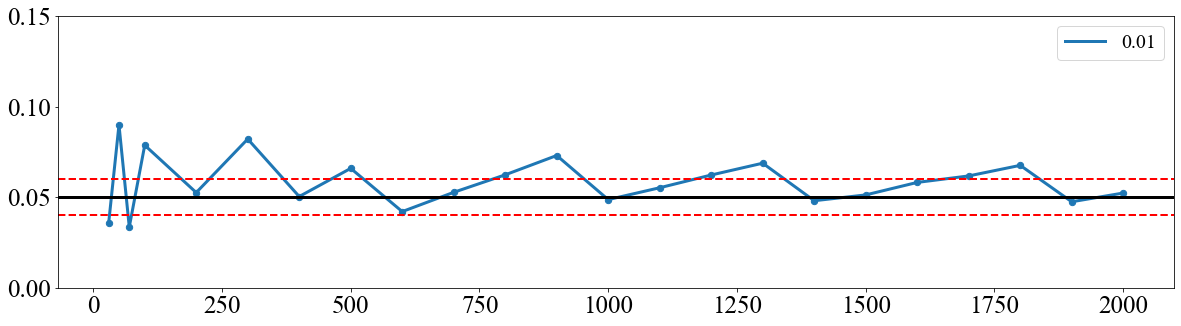

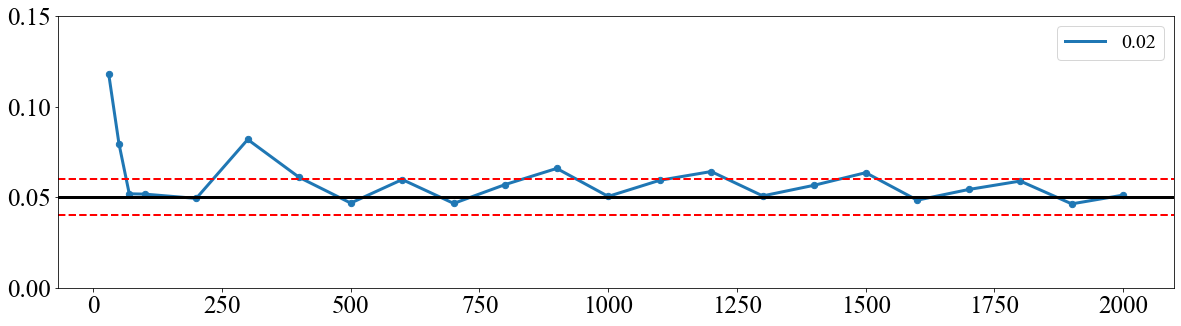

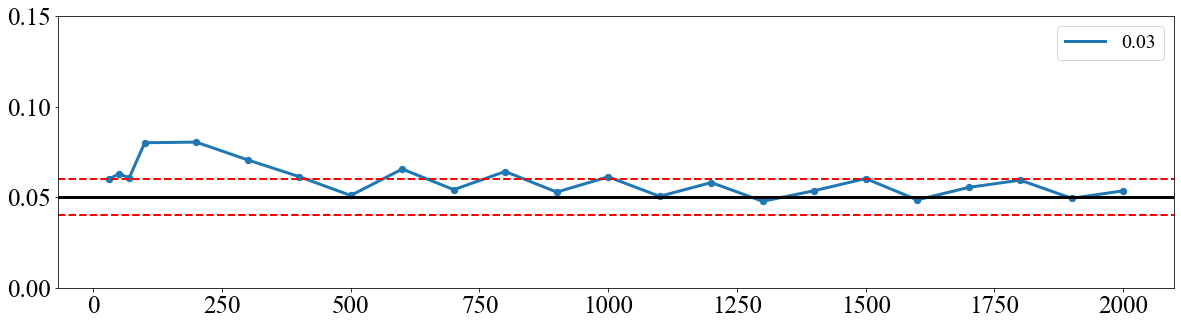

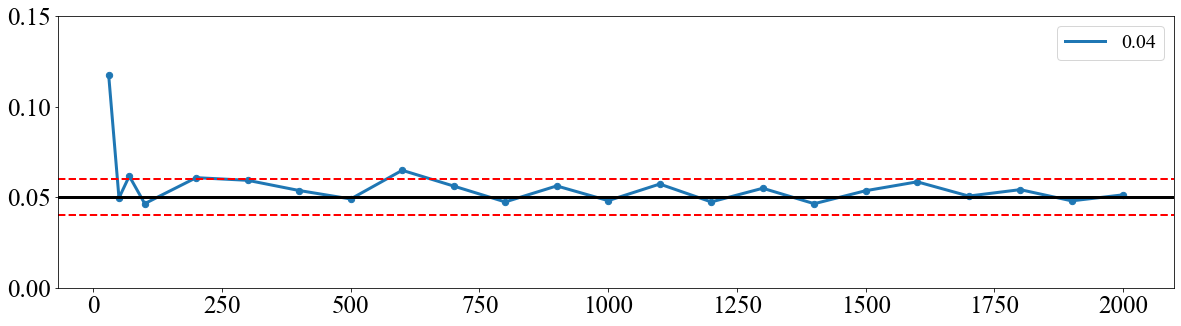

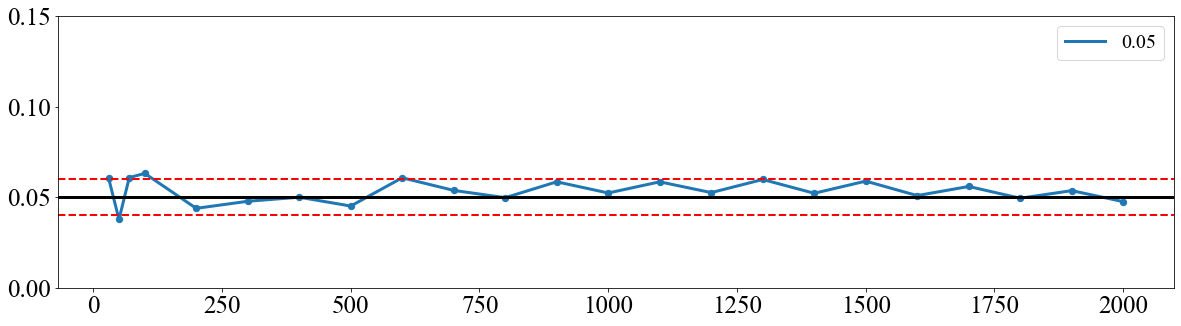

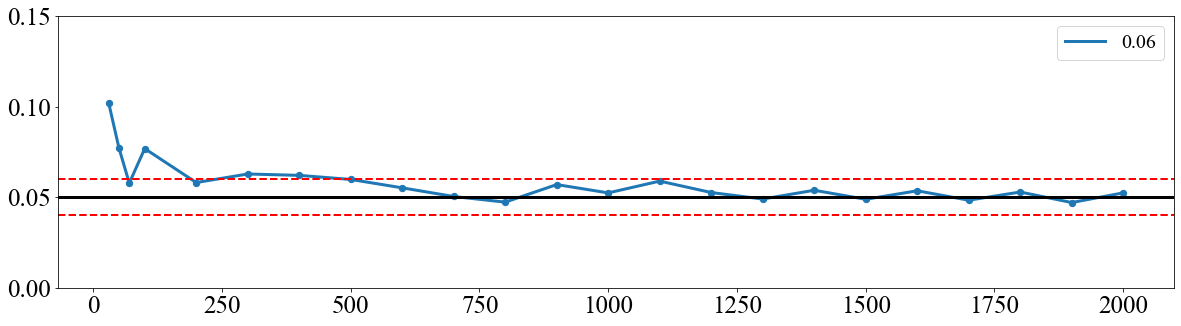

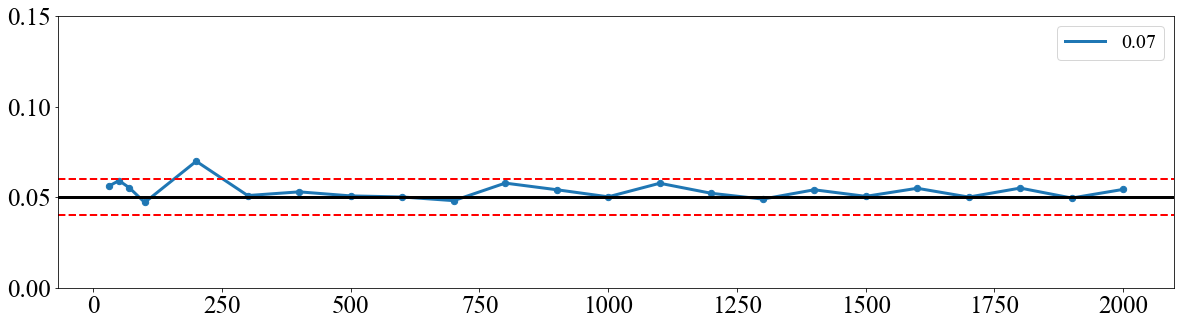

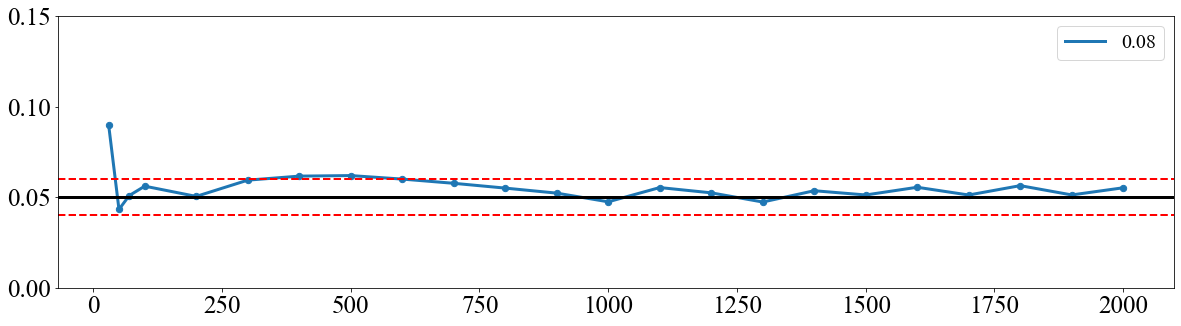

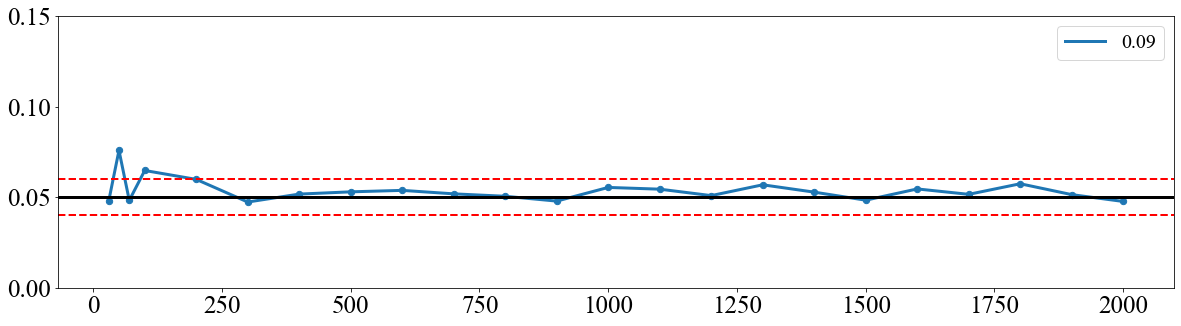

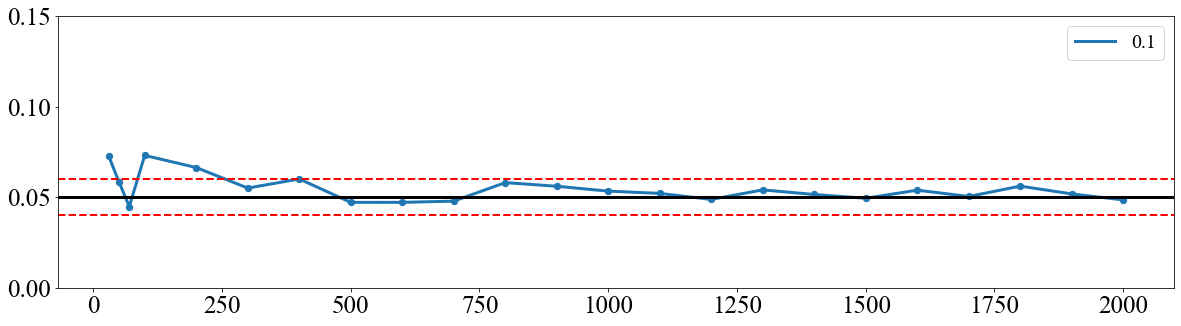

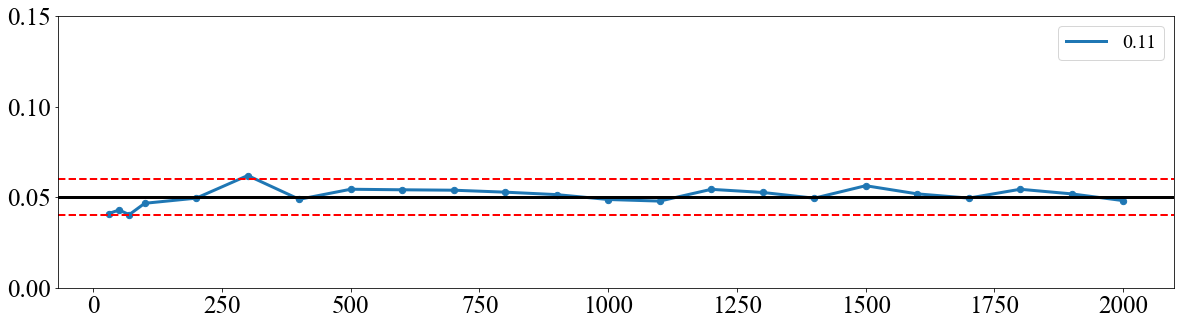

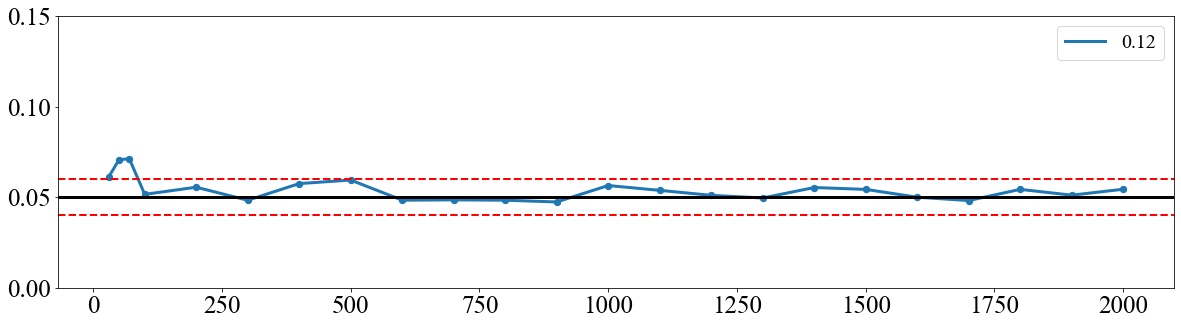

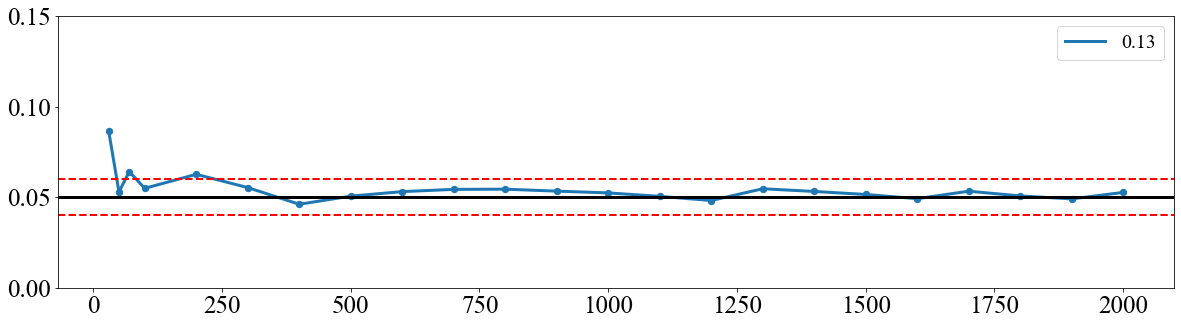

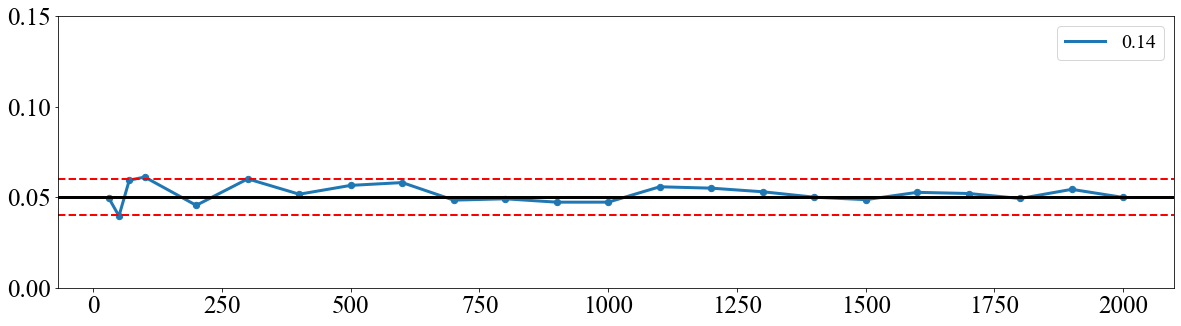

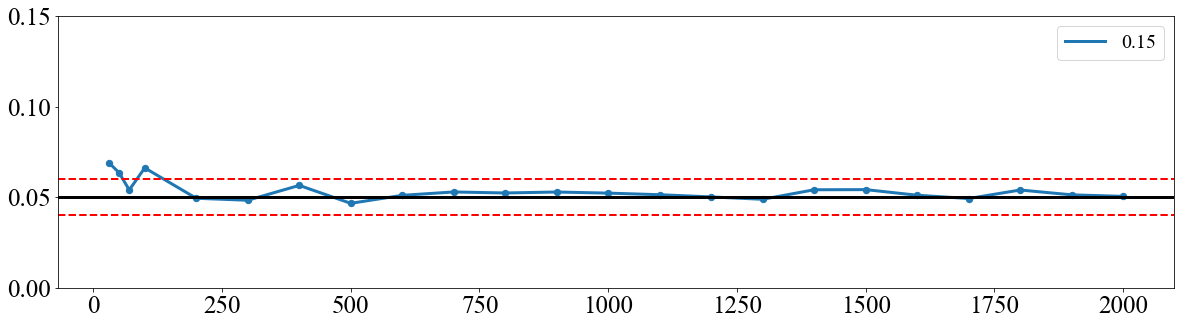

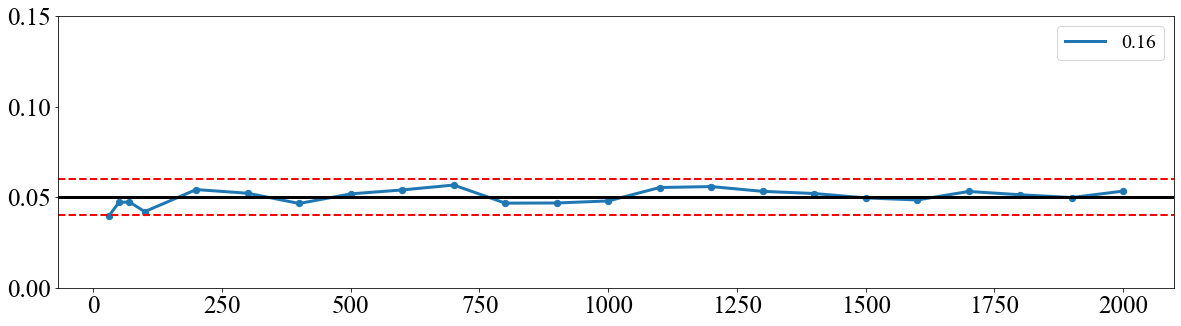

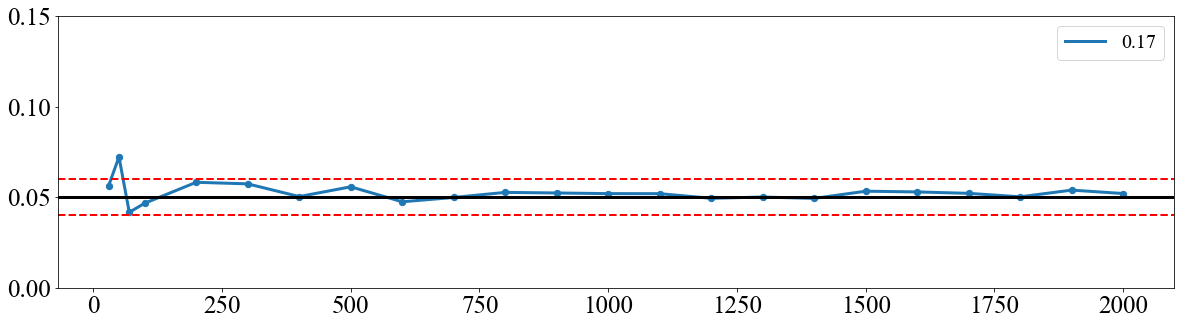

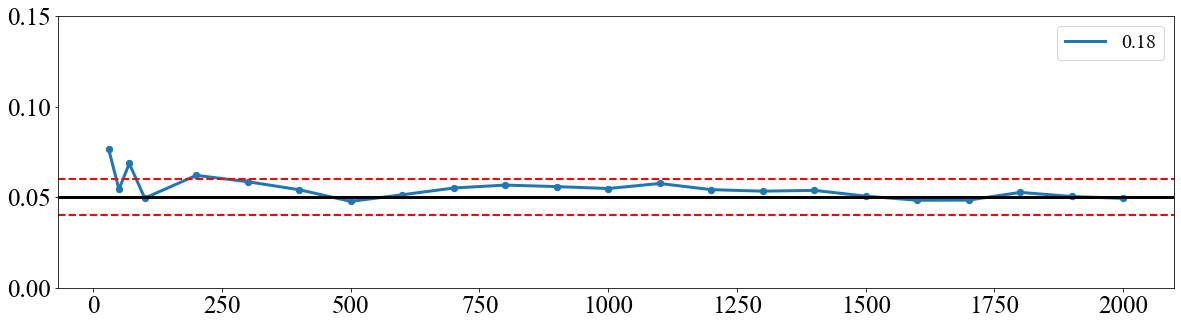

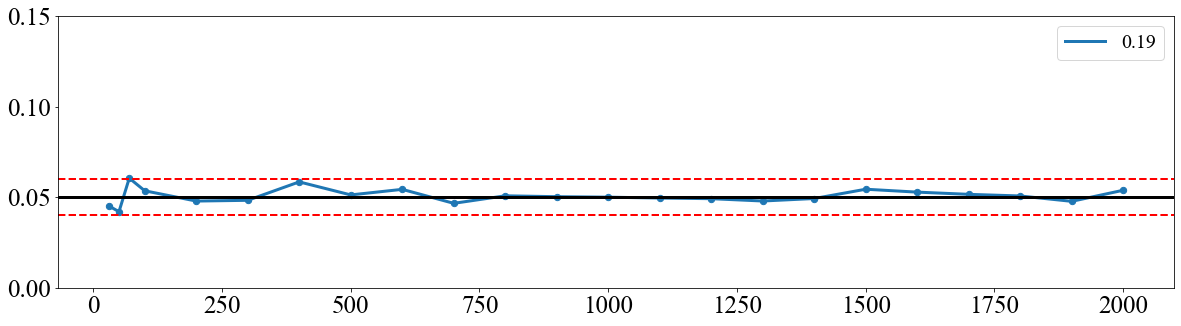

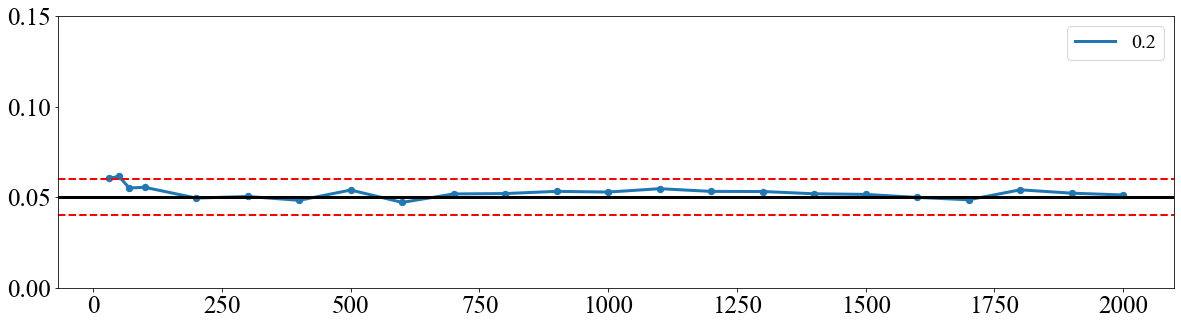

In [16]:
for c in df222.columns: 
    plt.figure(figsize = (20, 5))
    plt.scatter(x = df222[c].index, y = df222[c], s = 40)
    plt.plot(df222[c].index, df222[c], '-', label = c, linewidth = 3) 
    plt.axhline(α, color = 'black', linewidth = 3) 
    plt.axhline(α + 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    plt.axhline(α - 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    plt.ylim([0, .15])
    plt.xticks(fontsize = 25)
    #plt.yticks(list(np.arange(0, .14, .01)), fontsize = 25) 
    plt.yticks([0, α, .1, .15], fontsize = 25)
    #plt.xlabel('p', fontsize = 20, fontstyle = 'italic') 
    #plt.ylabel(r'$\alpha$(p)', fontsize = 20, rotation = 360, labelpad = 50, fontstyle = 'italic')
    plt.legend(fontsize = 20) 
    plt.show()